# Main params

In [ ]:
# isort
# black
from model_complex import Calibration, EpidData, FactoryBRModel
import matplotlib.pyplot as plt

data = EpidData('spb', './', f'7-01-20{10+0}', f'6-20-20{10+0+1}')
rho = (data['population_age_0-14'].iloc[-1] + data['population_age_15+'].iloc[-1])//10
init_infect = [100]
model = FactoryBRModel.total()

calibration = Calibration(init_infect, model, data, rho)

# Optuna and Annealing

In [ ]:
alpha, beta = calibration.optuna_calibration()

In [ ]:
from sklearn.metrics import r2_score

for e, m in enumerate(zip(*model.get_result())):
    m, d = m
    plt.text(0, 10000, f'R2_{e}: {round(r2_score(d, m),2)}')
    plt.text(0, 10000+e*1000, f'R2_{e}: {round(r2_score(d, m),2)}')
    plt.plot(m, label=str(e))
    plt.scatter([i for i in range(len(d))], d)
plt.title("Optuna, age-group")
plt.legend()
plt.plot()

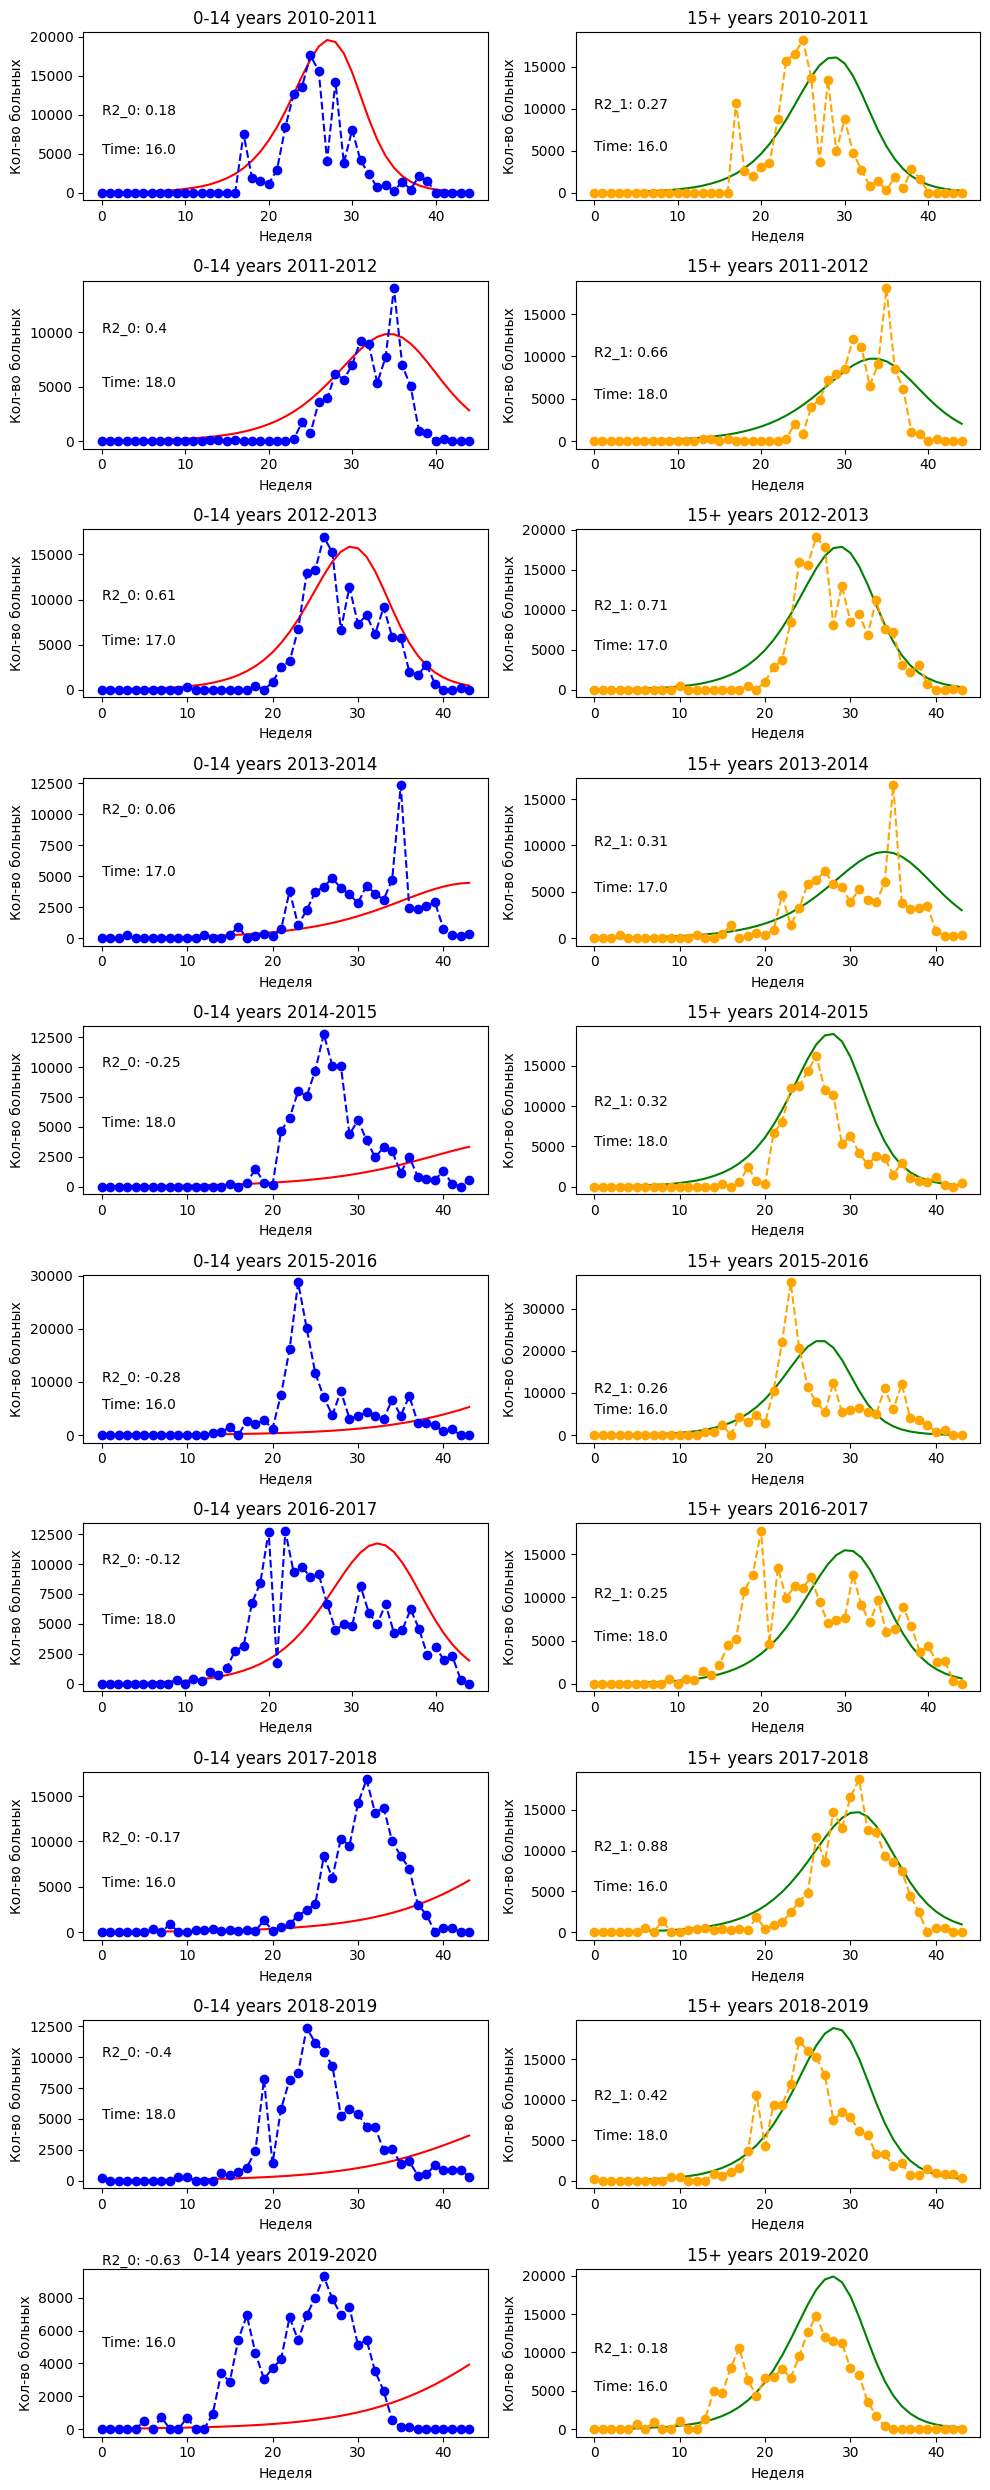

In [7]:
from model_complex import Calibration, EpidData, FactoryBRModel
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import time

st_year = 2010
years = 10
groups = 2

legend_dict = {0: '0-14 years', 1: '15+ years'}
color = {0: 'blue', 1: 'orange'}
main_color = {0: 'red', 1: 'green'}


fig, ax = plt.subplots(years, groups, figsize=(groups*5, years*2.5))
init_infect = [100, 100]
model = FactoryBRModel.age_group()

for i in range(years):
    data = EpidData('spb', './', f'8-21-{st_year + i}', f'6-20-{st_year + 1 + i}')
    rho = (data['population_age_0-14'].iloc[-1] + data['population_age_15+'].iloc[-1])//10

    calibration = Calibration(init_infect, model, data, rho)

    start = time.time()

    alpha, beta = calibration.optuna_calibration()

    for e, m in enumerate(zip(*model.get_result())):
        m, d = m
        ax[i][e].text(0, 5000, f'Time: {round(time.time()-start, 0)}')
        ax[i][e].text(0, 10000, f'R2_{e}: {round(r2_score(d, m),2)}')
        ax[i][e].plot(m, label=legend_dict[e], color=main_color[e])
        ax[i][e].plot([i for i in range(len(d))], d, '--o', color=color[e])
        ax[i][e].set_title(f'{legend_dict[e]} {st_year + i}-{st_year + 1 + i}')
        ax[i][e].set_xlabel('Неделя')
        ax[i][e].set_ylabel('Кол-во больных')


plt.tight_layout() 
plt.show()

# ABC

In [ ]:
alpha, beta = calibration.abc_calibration()

In [ ]:
from sklearn.metrics import r2_score

legend_dict = {0: 'total', 1: '15+'}
color = {0: 'blue', 1: 'orange'}
main_color = {0: 'red', 1: 'green'}

for a, b in zip(zip(*alpha), zip(*beta)):

    model.simulate(
        alpha=a, 
        beta=b, 
        initial_infectious=init_infect, 
        rho=rho, 
        modeling_duration=len(data)
    )

    for e, m in enumerate(zip(*model.get_result())):
        m, d = m
        plt.plot(m, lw=0.3, alpha=0.5, color=color[e])

alpha, beta = [a.mean() for a in alpha], [b.mean() for b in beta]

for e, m in enumerate(zip(*model.get_result())):
    m, d = m
    plt.text(0, 10000+e*1000, f'R2_{e}: {round(r2_score(d, m),2)}')
    plt.plot(m, label=legend_dict[e], color=main_color[e])
    plt.scatter([i for i in range(len(d))], d)
plt.title("Abc")
plt.legend()
plt.plot()

Initializing SMC sampler...
Sampling 6 chains in 6 jobs


Initializing SMC sampler...
Sampling 6 chains in 6 jobs


Initializing SMC sampler...
Sampling 6 chains in 6 jobs


Initializing SMC sampler...
Sampling 6 chains in 6 jobs


/home/luhter/model_complex/.venv/lib/python3.12/site-packages/arviz/data/base.py:272: UserWarning: More chains (6) than draws (5). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Initializing SMC sampler...
Sampling 6 chains in 6 jobs


Initializing SMC sampler...
Sampling 6 chains in 6 jobs


Initializing SMC sampler...
Sampling 6 chains in 6 jobs


Initializing SMC sampler...
Sampling 6 chains in 6 jobs


Initializing SMC sampler...
Sampling 6 chains in 6 jobs


Initializing SMC sampler...
Sampling 6 chains in 6 jobs


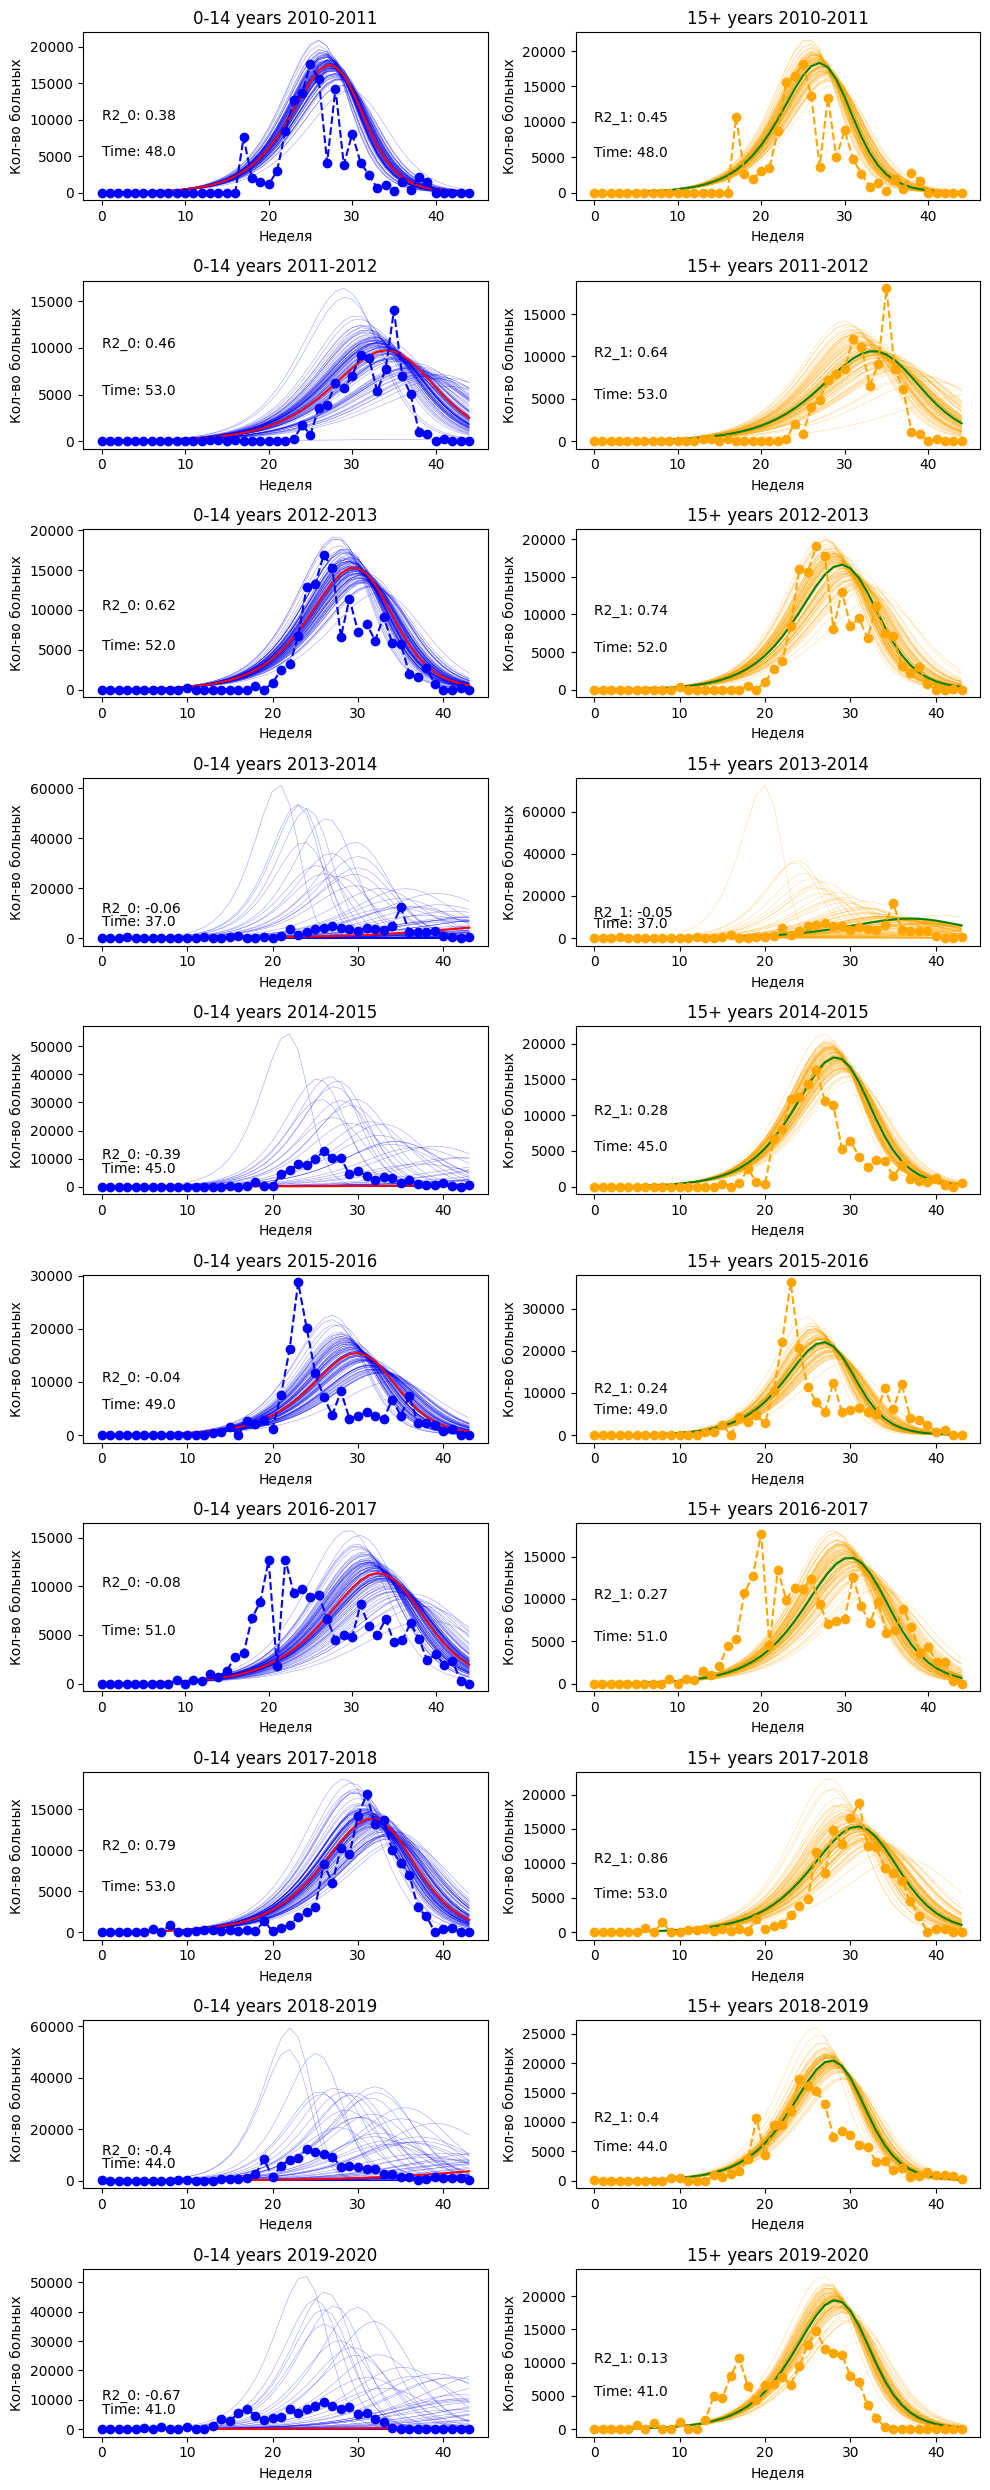

In [8]:
from model_complex import Calibration, EpidData, FactoryBRModel
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import time

st_year = 2010
years = 10
groups = 2

legend_dict = {0: '0-14 years', 1: '15+ years'}
color = {0: 'blue', 1: 'orange'}
main_color = {0: 'red', 1: 'green'}


fig, ax = plt.subplots(years, groups, figsize=(groups*5, years*2.5))
init_infect = [100, 100]
model = FactoryBRModel.age_group()

for i in range(years):
    data = EpidData('spb', './', f'8-21-{st_year + i}', f'6-20-{st_year + 1 + i}')
    rho = (data['population_age_0-14'].iloc[-1] + data['population_age_15+'].iloc[-1])//10

    calibration = Calibration(init_infect, model, data, rho)

    start = time.time()

    alpha, beta = calibration.abc_calibration()

    for a, b in zip(zip(*alpha), zip(*beta)):

        model.simulate(
            alpha=a, 
            beta=b, 
            initial_infectious=init_infect, 
            rho=rho, 
            modeling_duration=len(data)
        )

        for e, m in enumerate(zip(*model.get_result())):
            m, d = m
            ax[i][e].plot(m, lw=0.3, alpha=0.5, color=color[e])

    alpha, beta = [a.mean() for a in alpha], [b.mean() for b in beta]

    model.simulate(
            alpha=alpha, 
            beta=beta, 
            initial_infectious=init_infect, 
            rho=rho, 
            modeling_duration=len(data)
        )

    for e, m in enumerate(zip(*model.get_result())):
        m, d = m
        ax[i][e].text(0, 5000, f'Time: {round(time.time()-start, 0)}')
        ax[i][e].text(0, 10000, f'R2_{e}: {round(r2_score(d, m),2)}')
        ax[i][e].plot(m, label=legend_dict[e], color=main_color[e])
        ax[i][e].plot([i for i in range(len(d))], d, '--o', color=color[e])
        ax[i][e].set_title(f'{legend_dict[e]} {st_year + i}-{st_year + 1 + i}')
        ax[i][e].set_xlabel('Неделя')
        ax[i][e].set_ylabel('Кол-во больных')

plt.tight_layout() 
plt.show()

# Plot

In [ ]:
from model_complex import Calibration, EpidData, FactoryBRModel
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import time


fig, ax = plt.subplots(10, 1, figsize=(8, 25))

# поменять при запуске
legend_dict = {0: '0-14', 1: '15+'}

for i in range(10):
    start = time.time()
    st_year = 2010
    data = EpidData('spb', './', f'7-01-{st_year+i}', f'6-20-{st_year+1+i}')
    rho = (data['population_age_0-14'].iloc[-1] + data['population_age_15+'].iloc[-1])//10
    init_infect = [100]
    model = FactoryBRModel.total()

    d = Calibration(init_infect, model, data, rho)
    alpha, beta = d.annealing_calibration()

    model.simulate(
        alpha=alpha, 
        beta=beta, 
        initial_infectious=init_infect, 
        rho=rho, 
        modeling_duration=len(data)
    )

    for e, m in enumerate(zip(*model.get_result())):
        m, d = m
        ax[i].text(0, 5000 + e * 3000, f'R2_{e}: {round(r2_score(d, m),2)}')
        ax[i].plot(m, label=legend_dict[e])
        ax[i].scatter([i for i in range(len(d))], d)
    ax[i].text(0, 5000 + (e + 1) * 3000, f'Time: {round(time.time()-start)}')
    ax[i].text(0, 5000 + (e + 2) * 3000, f'{st_year+i}-{st_year+1+i}')
    ax[i].legend()

In [ ]:
from model_complex import Calibration, EpidData, FactoryBRModel
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import time


fig, ax = plt.subplots(10, 2, figsize=(12, 25))

# поменять при запуске
legend_dict = {0: 'total', 1: '15+'}
color = {0: 'blue', 1: 'orange'}
main_color = {0: 'red', 1: 'green'}

for i in range(10):
    start = time.time()
    st_year = 2010
    data = EpidData('spb', './', f'7-01-{st_year+i}', f'6-20-{st_year+1+i}')
    rho = (data['population_age_0-14'].iloc[-1] + data['population_age_15+'].iloc[-1])//10
    init_infect = [100]
    model = FactoryBRModel.total()

    d = Calibration(init_infect, model, data, rho)
    alpha, beta = d.abc_calibration()

    end_time = time.time()-start

    for a, b in zip(*alpha, *beta):
        if type(a) != tuple:
            a = [a]
            b = [b]

        model.simulate(
            alpha=a, 
            beta=b, 
            initial_infectious=init_infect, 
            rho=rho, 
            modeling_duration=len(data)
        )

        for e, m in enumerate(zip(*model.get_result())):
            m, d = m
            ax[i][e].plot(m, lw=0.3, alpha=0.5, color = color[e])

    alpha, beta = [a.mean() for a in alpha], [b.mean() for b in beta]

    model.simulate(
        alpha=alpha, 
        beta=beta, 
        initial_infectious=init_infect, 
        rho=rho, 
        modeling_duration=len(data)
    )

    for e, m in enumerate(zip(*model.get_result())):
        m, d = m
        ax[i][e].text(0, 5000 + 3000, f'R2_{e}: {round(r2_score(d, m),2)}')
        ax[i][e].plot(m, label=legend_dict[e], color = main_color[e])
        ax[i][e].scatter([i for i in range(len(d))], d)

        ax[i][e].text(0, 5000 + 6000, f'Time: {round(end_time)}')
        ax[i][e].text(0, 5000 + 9000, f'{st_year+i}-{st_year+1+i}')
        ax[i][e].legend()